In [1]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [2]:
#先开始我们的第一步啦.
import pandas as pd
import numpy as np
a=get_price('000001.XSHE',start_date='2015-04-01',end_date='2015-04-12')
a

limit_up     high  limit_down  total_turnover       volume  \
date                                                                     
2015-04-01   11.0931  10.3314      9.0768    2.608977e+09  236637563.0   
2015-04-02   11.2403  10.3314      9.1920    2.222671e+09  202440588.0   
2015-04-03   11.1251  10.2034      9.1024    2.262844e+09  206631550.0   
2015-04-07   11.1635  10.8563      9.1344    4.898119e+09  426308008.0   
2015-04-08   11.8356  11.5732      9.6849    5.784459e+09  485517069.0   
2015-04-09   12.6166  12.1941     10.3250    5.794632e+09  456921108.0   
2015-04-10   12.6742  12.6742     10.3698    6.339649e+09  480990210.0   

                low    close     open  num_trades  
date                                               
2015-04-01   9.9537  10.2162  10.1265     72105.0  
2015-04-02   9.9985  10.1137  10.2994     72424.0  
2015-04-03   9.9921  10.1457  10.0497     61025.0  
2015-04-07  10.3378  10.7603  10.3378    131387.0  
2015-04-08  10.6578  11.4708  10.8371    135077.0  
2015-04-09  11.3492  11.5220  11.4900    148293.0  
2015-04-10  11.4260  12.6742  11.5220    139375.0

In [3]:
stock_000001=get_price('000001.XSHE', start_date='2013-01-04', end_date='2014-01-04', frequency='1d', fields='close', adjust_type='pre')
type(stock_000001)

pandas.core.series.Series

In [4]:
stock_000001.head()

date
2013-01-04    5.2120
2013-01-07    5.3131
2013-01-08    5.2153
2013-01-09    5.1697
2013-01-10    5.1729
Name: close, dtype: float64

In [5]:
stock_000001=get_price('000001.XSHE', start_date='2013-01-04', end_date='2014-01-04', frequency='1d', adjust_type='pre')
stock_000001.head()

limit_up    high  limit_down  total_turnover       volume     low  \
date                                                                            
2013-01-04    5.7434  5.3620      4.7003    7.175675e+08  122716027.0  5.1892   
2013-01-07    5.7336  5.3294      4.6905    5.784505e+08   98750154.0  5.1762   
2013-01-08    5.8444  5.3359      4.7818    5.013601e+08   86394227.0  5.1697   
2013-01-09    5.7368  5.2218      4.6938    3.996962e+08   69487483.0  5.1501   
2013-01-10    5.6879  5.2479      4.6514    3.833477e+08   66363569.0  5.1469   

             close    open  num_trades  
date                                    
2013-01-04  5.2120  5.3196     14847.0  
2013-01-07  5.3131  5.2088     12904.0  
2013-01-08  5.2153  5.3131     13639.0  
2013-01-09  5.1697  5.2023     11548.0  
2013-01-10  5.1729  5.1697     10789.0

In [6]:
stock_000001=get_price(['000024.XSHE', '000001.XSHE', '000002.XSHE'], start_date='2013-01-04', end_date='2014-01-04', frequency='1d', fields='close', adjust_type='pre')
stock_000001.head()

000002.XSHE  000024.XSHE  000001.XSHE
date                                             
2013-01-04       7.5652      19.9948       5.2120
2013-01-07       7.5652      19.4741       5.3131
2013-01-08       7.5652      19.0423       5.2153
2013-01-09       7.5652      19.0804       5.1697
2013-01-10       7.5652      19.1757       5.1729

In [7]:
# 获取所有的三维信息
stock_000001=get_price(['000024.XSHE', '000001.XSHE', '000002.XSHE'], start_date='2013-01-04', end_date='2014-01-04', frequency='1d', adjust_type='pre')
stock_000001

/usr/local/lib/python3.6/site-packages/rqdatac/services/get_price.py:134: UserWarning: Panel is removed after pandas version 0.25.0. the default value of 'expect_df' will change to True in the future.
  warnings.warn("Panel is removed after pandas version 0.25.0."


<class 'pandas.core.panel.Panel'>
Dimensions: 9 (items) x 240 (major_axis) x 3 (minor_axis)
Items axis: limit_up to num_trades
Major_axis axis: 2013-01-04 00:00:00 to 2014-01-03 00:00:00
Minor_axis axis: 000001.XSHE to 000024.XSHE

In [8]:
stock_000001.minor_xs('000024.XSHE').head()

limit_up     high  limit_down  total_turnover      volume  \
date                                                                    
2013-01-04   20.8774  20.0011     17.0803    5.451177e+08  26568432.0   
2013-01-07   21.9949  20.0329     17.9947    5.036225e+08  24563299.0   
2013-01-08   21.4234  19.4741     17.5248    6.177849e+08  31063504.0   
2013-01-09   20.9472  19.1439     17.1375    5.119013e+08  25784560.0   
2013-01-10   20.9917  19.5440     17.1756    5.104589e+08  25227855.0   

                low    close     open  num_trades  
date                                               
2013-01-04  19.0741  19.9948  19.0804     11663.0  
2013-01-07  19.1122  19.4741  19.9376     10047.0  
2013-01-08  18.6042  19.0423  19.4741     14205.0  
2013-01-09  18.6677  19.0804  18.9281     10997.0  
2013-01-10  18.9725  19.1757  19.2138     14447.0

In [9]:
get_trading_dates( start_date='2013-01-04', end_date='2014-01-04')[:5]

[datetime.date(2013, 1, 4),
 datetime.date(2013, 1, 7),
 datetime.date(2013, 1, 8),
 datetime.date(2013, 1, 9),
 datetime.date(2013, 1, 10)]

In [10]:
dp=get_fundamentals(query=query(fundamentals.income_statement.revenue, fundamentals.income_statement.cost_of_goods_sold
).filter(fundamentals.income_statement.stockcode.in_(['002478.XSHE', '000151.XSHE'])), entry_date= '2015-01-10', interval='5y', report_quarter=False)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: 'get_fundamentals' is deprecated, and will be removed soon. use get_factor instead.
  
/usr/local/lib/python3.6/site-packages/rqdatac/services/financial.py:480: UserWarning: Panel is  removed after pandas version 0.25.0.the  default value of 'expect_df' will change to True in the future.
  warnings.warn("Panel is  removed after pandas version 0.25.0."


In [11]:
dp['revenue']

000151.XSHE  002478.XSHE
2015-01-09   1.7337e+09  2.93784e+09
2014-01-09  8.83935e+08  2.92632e+09
2013-01-09  9.48898e+08  2.61653e+09
2012-01-09  6.20593e+08  2.68102e+09
2011-01-07  4.99812e+08  2.03415e+09

In [12]:
# 序列数据
dp.minor_xs('000151.XSHE')

cost_of_goods_sold      revenue
2015-01-09        1.50072e+09   1.7337e+09
2014-01-09        7.42093e+08  8.83935e+08
2013-01-09        8.73735e+08  9.48898e+08
2012-01-09        5.58121e+08  6.20593e+08
2011-01-07        4.33559e+08  4.99812e+08

In [13]:
# 获取财务数据
q = query(fundamentals.income_statement.revenue,
         fundamentals.income_statement.cost_of_goods_sold
         ).filter(fundamentals.stockcode.in_(['000024.XSHE', '000001.XSHE']))
fund = get_fundamentals(q, entry_date="2017-01-03")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: 'get_fundamentals' is deprecated, and will be removed soon. use get_factor instead.
  """


In [14]:
dp[:,'2015-01-09',:][:,'2015-01-09',:]

cost_of_goods_sold      revenue
000151.XSHE        1.50072e+09   1.7337e+09
002478.XSHE        2.43062e+09  2.93784e+09

In [15]:
# 对pe_ration进行去极值
fund = get_fundamentals(query(fundamentals.eod_derivative_indicator.pe_ratio), entry_date="20180102")[:, "20180102", :]
fund.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: 'get_fundamentals' is deprecated, and will be removed soon. use get_factor instead.
  


pe_ratio
600054.XSHG  25.9351
600316.XSHG   334.01
000570.XSHE    68.19
000892.XSHE  18.9271
000715.XSHE  31.6029

In [16]:

fund['pe_ration_winsorize']=winsorize(fund['pe_ratio'],limits=0.025)
fund.head()

pe_ratio pe_ration_winsorize
600054.XSHG  25.9351             25.9351
600316.XSHG   334.01              334.01
000570.XSHE    68.19               68.19
000892.XSHE  18.9271             18.9271
000715.XSHE  31.6029             31.6029

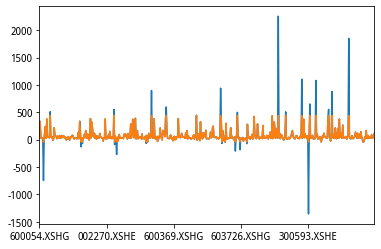

In [17]:
fund['pe_ratio'][:500].plot()
fund['pe_ration_winsorize'][:500].plot()

In [18]:
# 求出两个分位数的点的值
def quantile(factor,up,down):
    up_scale=np.percentile(factor,up)
    down_scale=np.percentile(factor,down)
    factor=np.where(factor>up_scale,up_scale,factor)
    factor=np.where(factor<down_scale,down_scale,factor)
    return factor

In [19]:
# quantile(fund['pe_ratio'], 97.5, 2.5)
fund['pe_percentile_ratio']=quantile(factor=fund['pe_ratio'],up=97.5,down=2.5)
 

In [20]:
# 4、中位数绝对偏差去极值
def median(factor):
    """3倍中位数去极值
    """
    # 求出因子值的中位数
    med=np.median(factor)
    # 求出因子值与中位数的差值，进行绝对值
    mad=np.median(abs(factor-med))
    
    # 定义几倍的中位数上下限
    high=med+(3*1.4826)*mad
    low=med-(3*1.4826)*mad
    
    # 替换上下限以外的值
    factor=np.where(factor>high,high,factor)
    factor=np.where(factor<low,low,factor)
    return factor

In [21]:
fund['pe_3mad']=median(fund['pe_ratio'])

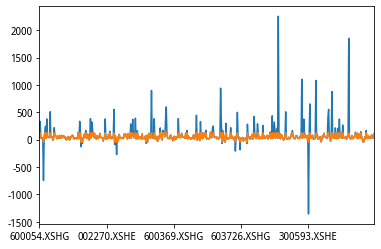

In [22]:
fund['pe_ratio'][:500].plot()
fund['pe_3mad'][:500].plot()

In [23]:
# 5、正态分布去极值

In [24]:
# 3sigma原则
def three_sigma(factor):

  # 求出因子数据的平均值和标准差
  mean = factor.mean()
  std = factor.std()
  # 左右的数据加减3个标准差
  high = mean + (1 * std)
  low = mean - (1 * std)

  # 替换极值数据
  factor = np.where(factor > high, high, factor)
  factor = np.where(factor < low, low, factor)

  return factor

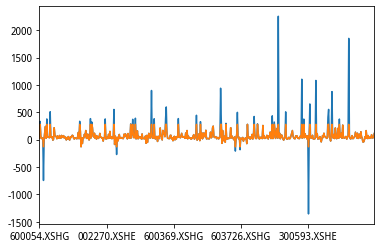

In [25]:
fund['pe_three_sigma']=three_sigma(fund['pe_ratio'])
fund['pe_ratio'][:500].plot()
fund['pe_three_sigma'][:500].plot()

In [26]:
fund['pe_ratio'].head()

600054.XSHG    25.9351
600316.XSHG     334.01
000570.XSHE      68.19
000892.XSHE    18.9271
000715.XSHE    31.6029
Name: pe_ratio, dtype: object

In [28]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()


In [29]:
def stand(factor):
    """
    自实现标准化
    """
    mean=factor.mean()
    std=factor.std()
    return (factor-mean)/std

In [30]:
fund['pe_ratio']=stand(fund['pe_ratio'])
fund['pe_ratio'].head()

600054.XSHG    -0.234276
600316.XSHG      1.26669
000570.XSHE   -0.0284054
000892.XSHE    -0.268419
000715.XSHE    -0.206661
Name: pe_ratio, dtype: object

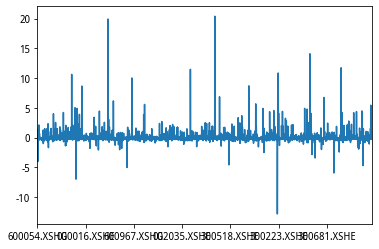

In [31]:
fund['pe_ratio'].plot()

In [32]:
from sklearn.linear_model import LinearRegression

In [46]:
# 获取两个因子
q=query(fundamentals.eod_derivative_indicator.pb_ratio,fundamentals.eod_derivative_indicator.market_cap)

# 获取某一天的横截面数据
factor=get_fundamentals(q,entry_date='2018-01-03')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: 'get_fundamentals' is deprecated, and will be removed soon. use get_factor instead.
  """


In [47]:
panel=factor


In [48]:
panel[:,'2018-01-03',:].head()

pb_ratio   market_cap
600073.XSHG   2.1877   7.7644e+09
000612.XSHE   2.3565  1.10994e+10
600033.XSHG    1.162  1.00994e+10
000017.XSHE  218.829  3.47901e+09
600470.XSHG   1.4695  3.04614e+09

In [49]:
factor=panel[:,'2018-01-03',:]

factor.head()

pb_ratio   market_cap
600073.XSHG   2.1877   7.7644e+09
000612.XSHE   2.3565  1.10994e+10
600033.XSHG    1.162  1.00994e+10
000017.XSHE  218.829  3.47901e+09
600470.XSHG   1.4695  3.04614e+09

In [50]:
# 先对pb_ratio进行去极值标准化处理
factor['pb_ratio']=median(factor['pb_ratio'])
factor['pb_ratio']=stand(factor['pb_ratio'])
factor.head()

pb_ratio   market_cap
600073.XSHG -0.740836   7.7644e+09
000612.XSHE -0.662451  1.10994e+10
600033.XSHG  -1.21714  1.00994e+10
000017.XSHE   2.33074  3.47901e+09
600470.XSHG  -1.07435  3.04614e+09

In [53]:
factor['market_cap'].head()

600073.XSHG     7.7644e+09
000612.XSHE    1.10994e+10
600033.XSHG    1.00994e+10
000017.XSHE    3.47901e+09
600470.XSHG    3.04614e+09
Name: market_cap, dtype: object

In [55]:

x = factor['market_cap'].values.reshape(-1,1)

In [56]:
x

array([[7764400028.0],
       [11099376358.0],
       [10099392000.0],
       ...,
       [167133250284.0],
       [15564596442.0],
       [6549561105.0]], dtype=object)

In [57]:
y = factor['pb_ratio']

In [58]:
# 建立回归方程并预测
lr=LinearRegression()
lr.fit(x,y)
y_predict=lr.predict(x)

In [59]:
factor['pb_ratio']=y-y_predict

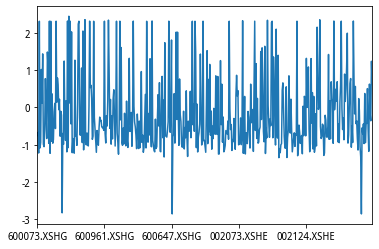

In [60]:
factor['pb_ratio'][:500].plot()